In [71]:
import pandas as pd
# Relative path to the dataset
file_path_Alzheimer = "../data/raw/ALZHEIMER_Dataset/Dataset/alzheimers_disease_data.csv"

# Load the dataset
data_Alzheimer = pd.read_csv(file_path_Alzheimer)

data_Alzheimer.drop(columns=['DoctorInCharge', 'EducationLevel', 'PatientID'], inplace=True)

print(data_Alzheimer.info()) ## Check if there's any Null Info and check variable type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2149 non-null   int64  
 3   BMI                        2149 non-null   float64
 4   Smoking                    2149 non-null   int64  
 5   AlcoholConsumption         2149 non-null   float64
 6   PhysicalActivity           2149 non-null   float64
 7   DietQuality                2149 non-null   float64
 8   SleepQuality               2149 non-null   float64
 9   FamilyHistoryAlzheimers    2149 non-null   int64  
 10  CardiovascularDisease      2149 non-null   int64  
 11  Diabetes                   2149 non-null   int64  
 12  Depression                 2149 non-null   int64  
 13  HeadInjury                 2149 non-null   int64

In [72]:
print("Alzheimer Diagnosis Distribution:\n", data_Alzheimer['Diagnosis'].value_counts())

Alzheimer Diagnosis Distribution:
 Diagnosis
0    1389
1     760
Name: count, dtype: int64


In [73]:
# #RESAMPLE
# from sklearn.utils import resample
#
# # Separate majority and minority classes
# data_majority = data_Alzheimer[data_Alzheimer['Diagnosis'] == 0]
# data_minority = data_Alzheimer[data_Alzheimer['Diagnosis'] == 1]
#
# # Oversample minority class
# data_minority_oversampled = resample(data_minority,
#                                      replace=True,  # sample with replacement
#                                      n_samples=len(data_majority),  # to match the majority class size
#                                      random_state=42)  # for reproducibility
#
# # Combine majority class with oversampled minority class
# data_oversampled = pd.concat([data_majority, data_minority_oversampled])
#
# print("Alzheimer Diagnosis Distribution after balancing:\n", data_oversampled['Diagnosis'].value_counts())


In [74]:
from sklearn.utils import resample

# Making copies of majority and minority classes to avoid modifying original data
data_majority = data_Alzheimer[data_Alzheimer['Diagnosis'] == 0].copy()
data_minority = data_Alzheimer[data_Alzheimer['Diagnosis'] == 1].copy()

# Oversample minority class
data_minority_oversampled = resample(data_minority,
                                     replace=True,  # sample with replacement
                                     n_samples=len(data_majority),  # to match the majority class size
                                     random_state=42)  # for reproducibility

# Combine majority class with oversampled minority class
data_oversampled = pd.concat([data_majority, data_minority_oversampled])

# Determine the number of samples to keep from each part
n_samples_to_keep = 1300

# Ensure not to delete any original data by making copies for reduction
majority_for_reduction = data_majority.copy()
minority_for_reduction = data_minority_oversampled.copy()

# Randomly sample from majority and oversampled minority classes
reduced_majority_sample = resample(majority_for_reduction,
                                   replace=False,  # sample without replacement
                                   n_samples=n_samples_to_keep,  # number of samples to keep
                                   random_state=42)  # for reproducibility

reduced_minority_sample = resample(minority_for_reduction,
                                   replace=False,  # sample without replacement
                                   n_samples=n_samples_to_keep,  # number of samples to keep
                                   random_state=42)  # for reproducibility

# Combine the reduced samples to create a balanced dataset
data_balanced = pd.concat([reduced_majority_sample, reduced_minority_sample])

# Display new class counts
print("Alzheimer Diagnosis Distribution after balancing:\n", data_balanced['Diagnosis'].value_counts())

Alzheimer Diagnosis Distribution after balancing:
 Diagnosis
0    1300
1    1300
Name: count, dtype: int64


In [75]:
#SPLIT TRAINING AND TESTING DATA
from sklearn.model_selection import train_test_split

X_Alzheimer = data_balanced.drop(columns=['Diagnosis'])
y_Alzheimer = data_balanced['Diagnosis']

X_train_alzheimer, X_test_alzheimer, y_train_alzheimer, y_test_alzheimer = train_test_split(
    X_Alzheimer,
    y_Alzheimer,
    test_size=0.2,
    random_state=42
)

X_train_alzheimer.head()

,Age,Gender,Ethnicity,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,...,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
35,70,0,0,22.784157,1,17.819125,3.769175,6.633075,4.872168,0,...,19.604056,7.401673,0,1,9.947440,0,0,1,0,0
648,63,0,0,39.056533,0,18.861933,4.360621,1.126333,6.751384,0,...,3.090384,5.542020,0,0,5.414518,1,0,0,1,0
123,75,0,3,21.574301,0,6.684209,2.687729,6.335718,8.384602,1,...,13.914640,2.890269,1,0,7.959653,0,0,0,0,1
2090,90,1,1,18.381473,0,7.185066,3.144429,4.180192,7.783483,0,...,22.072584,9.740092,0,0,3.265412,0,1,0,0,0
48,87,0,1,33.476971,1,15.809404,9.338358,9.648614,8.204619,0,...,25.834574,2.558636,1,1,2.597108,0,0,0,0,1


In [76]:
#LOGISTIC REGRESSION
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data, and transform the test data
X_train_scaled_alzheimer = scaler.fit_transform(X_train_alzheimer)
X_test_scaled_alzheimer = scaler.transform(X_test_alzheimer)
X_train_scaled_alzheimer_resampled = scaler.fit_transform(data_balanced.drop(columns=['Diagnosis']))

# Instantiate the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model_resampled = LogisticRegression(class_weight='balanced', max_iter=1000)

# Train the model
model.fit(X_train_scaled_alzheimer, y_train_alzheimer)
model_resampled.fit(X_train_scaled_alzheimer_resampled, data_balanced['Diagnosis'])

# Predict on the test set
y_pred_alzheimer = model.predict(X_test_scaled_alzheimer)
y_pred_resampled = model_resampled.predict(X_test_scaled_alzheimer)

# Evaluate accuracy
accuracy = accuracy_score(y_test_alzheimer, y_pred_alzheimer)
accuracy_resampled = accuracy_score(y_test_alzheimer, y_pred_resampled)
print(f'Accuracy: {accuracy:.4f}')
print(f'Accuracy (resampled): {accuracy_resampled:.4f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test_alzheimer, y_pred_alzheimer)
conf_matrix_resampled = confusion_matrix(y_test_alzheimer, y_pred_resampled)
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Confusion Matrix (resampled):\n{conf_matrix_resampled}')

# Classification report
class_report = classification_report(y_test_alzheimer, y_pred_alzheimer)
class_report_resampled = classification_report(y_test_alzheimer, y_pred_resampled)
print(f'Classification Report:\n{class_report}')
print(f'Classification Report (resampled):\n{class_report_resampled}')

Accuracy: 0.8250
Accuracy (resampled): 0.8212
Confusion Matrix:
[[205  49]
 [ 42 224]]
Confusion Matrix (resampled):
[[205  49]
 [ 44 222]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       254
           1       0.82      0.84      0.83       266

    accuracy                           0.82       520
   macro avg       0.83      0.82      0.82       520
weighted avg       0.83      0.82      0.82       520

Classification Report (resampled):
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       254
           1       0.82      0.83      0.83       266

    accuracy                           0.82       520
   macro avg       0.82      0.82      0.82       520
weighted avg       0.82      0.82      0.82       520



##SVM

In [77]:
#SUPPORT VECTOR MACHINE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svm_model = SVC(kernel='linear')
svm_model_resampled = SVC(kernel='linear', class_weight='balanced')

# Train the model
svm_model.fit(X_train_scaled_alzheimer, y_train_alzheimer)
svm_model_resampled.fit(X_train_scaled_alzheimer_resampled, data_balanced['Diagnosis'])

# Predict on the test set
y_pred_alzheimer = svm_model.predict(X_test_scaled_alzheimer)
y_pred_resampled = svm_model_resampled.predict(X_test_scaled_alzheimer)

# Evaluate accuracy
accuracy = accuracy_score(y_test_alzheimer, y_pred_alzheimer)
accuracy_resampled = accuracy_score(y_test_alzheimer, y_pred_resampled)
print(f'Accuracy: {accuracy:.4f}')
print(f'Accuracy (resampled): {accuracy_resampled:.4f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test_alzheimer, y_pred_alzheimer)
conf_matrix_resampled = confusion_matrix(y_test_alzheimer, y_pred_resampled)
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Confusion Matrix (resampled):\n{conf_matrix_resampled}')

# Classification report
class_report = classification_report(y_test_alzheimer, y_pred_alzheimer)
class_report_resampled = classification_report(y_test_alzheimer, y_pred_resampled)
print(f'Classification Report:\n{class_report}')
print(f'Classification Report (resampled):\n{class_report_resampled}')


Accuracy: 0.8250
Accuracy (resampled): 0.8308
Confusion Matrix:
[[206  48]
 [ 43 223]]
Confusion Matrix (resampled):
[[208  46]
 [ 42 224]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       254
           1       0.82      0.84      0.83       266

    accuracy                           0.82       520
   macro avg       0.83      0.82      0.82       520
weighted avg       0.83      0.82      0.82       520

Classification Report (resampled):
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       254
           1       0.83      0.84      0.84       266

    accuracy                           0.83       520
   macro avg       0.83      0.83      0.83       520
weighted avg       0.83      0.83      0.83       520



Cross-validated Accuracy Scores (original model):
[0.94471154 0.94471154 0.94951923 0.9375     0.91586538]
Cross-validated Mean Accuracy: 0.9385
Cross-validated Accuracy Scores (resampled model):
[0.94615385 0.93653846 0.94230769 0.94615385 0.92307692]
Cross-validated Mean Accuracy (resampled): 0.9388
Accuracy: 0.9135
Accuracy (resampled): 0.9846
Confusion Matrix:
[[227  27]
 [ 18 248]]
Confusion Matrix (resampled):
[[252   2]
 [  6 260]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       254
           1       0.90      0.93      0.92       266

    accuracy                           0.91       520
   macro avg       0.91      0.91      0.91       520
weighted avg       0.91      0.91      0.91       520

Classification Report (resampled):
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       254
           1       0.99      0.98      0.98       266

    accu

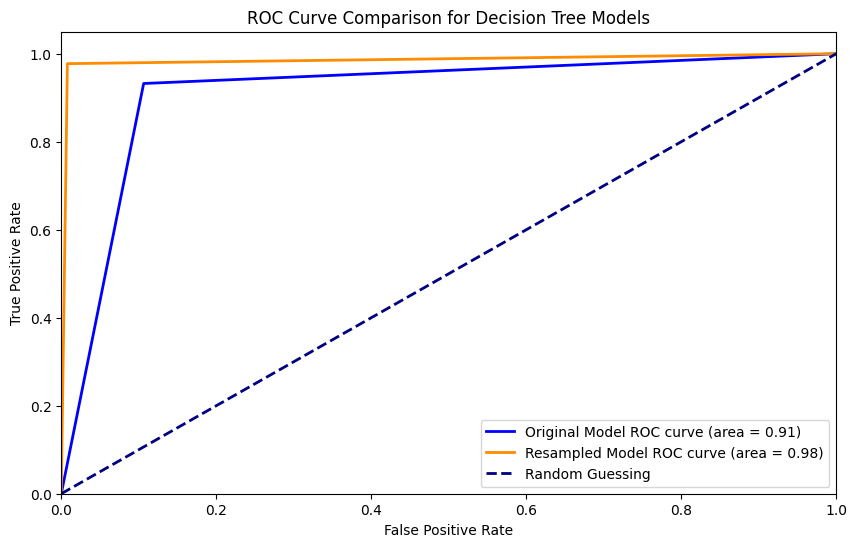

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, matthews_corrcoef, \
    roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Standardize datasets
scaler = StandardScaler()
X_train_scaled_alzheimer = scaler.fit_transform(X_train_alzheimer)
X_test_scaled_alzheimer = scaler.transform(X_test_alzheimer)
X_train_scaled_alzheimer_resampled = scaler.fit_transform(data_balanced.drop(columns='Diagnosis'))

# Instantiate models
dt_model = DecisionTreeClassifier(random_state=42)
dt_model_resampled = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Perform stratified cross-validation for the original model
accuracy_scores = cross_val_score(dt_model, X_train_scaled_alzheimer, y_train_alzheimer, cv=skf, scoring='accuracy')
y_pred_cross_val = cross_val_predict(dt_model, X_train_scaled_alzheimer, y_train_alzheimer, cv=skf)

# Perform stratified cross-validation for the resampled model
accuracy_scores_resampled = cross_val_score(dt_model_resampled, X_train_scaled_alzheimer_resampled,
                                            data_balanced['Diagnosis'], cv=skf, scoring='accuracy')
y_pred_cross_val_resampled = cross_val_predict(dt_model_resampled, X_train_scaled_alzheimer_resampled,
                                               data_balanced['Diagnosis'], cv=skf)

# Fit the original model
dt_model.fit(X_train_scaled_alzheimer, y_train_alzheimer)
y_pred_alzheimer = dt_model.predict(X_test_scaled_alzheimer)

# Fit the resampled model
dt_model_resampled.fit(X_train_scaled_alzheimer_resampled, data_balanced['Diagnosis'])
y_pred_resampled = dt_model_resampled.predict(X_test_scaled_alzheimer)

# Evaluate cross-validated accuracy
print("Cross-validated Accuracy Scores (original model):")
print(accuracy_scores)
print(f'Cross-validated Mean Accuracy: {accuracy_scores.mean():.4f}')

print("Cross-validated Accuracy Scores (resampled model):")
print(accuracy_scores_resampled)
print(f'Cross-validated Mean Accuracy (resampled): {accuracy_scores_resampled.mean():.4f}')

# Evaluate accuracy on test set
accuracy = accuracy_score(y_test_alzheimer, y_pred_alzheimer)
accuracy_resampled = accuracy_score(y_test_alzheimer, y_pred_resampled)
print(f'Accuracy: {accuracy:.4f}')
print(f'Accuracy (resampled): {accuracy_resampled:.4f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test_alzheimer, y_pred_alzheimer)
conf_matrix_resampled = confusion_matrix(y_test_alzheimer, y_pred_resampled)
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Confusion Matrix (resampled):\n{conf_matrix_resampled}')

# Classification report
class_report = classification_report(y_test_alzheimer, y_pred_alzheimer)
class_report_resampled = classification_report(y_test_alzheimer, y_pred_resampled)
print(f'Classification Report:\n{class_report}')
print(f'Classification Report (resampled):\n{class_report_resampled}')

# Additional metrics: ROC-AUC and Matthews Correlation Coefficient
roc_auc = roc_auc_score(y_test_alzheimer, y_pred_alzheimer)
roc_auc_resampled = roc_auc_score(y_test_alzheimer, y_pred_resampled)
mcc = matthews_corrcoef(y_test_alzheimer, y_pred_alzheimer)
mcc_resampled = matthews_corrcoef(y_test_alzheimer, y_pred_resampled)

print(f'ROC-AUC: {roc_auc:.4f}')
print(f'ROC-AUC (resampled): {roc_auc_resampled:.4f}')
print(f'Matthews Correlation Coefficient: {mcc:.4f}')
print(f'Matthews Correlation Coefficient (resampled): {mcc_resampled:.4f}')

# Plot ROC Curves for both models
y_prob_alzheimer = dt_model.predict_proba(X_test_scaled_alzheimer)[:, 1]  # Get probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test_alzheimer, y_prob_alzheimer)
roc_auc = auc(fpr, tpr)

y_prob_resampled = dt_model_resampled.predict_proba(X_test_scaled_alzheimer)[:, 1]
fpr_resampled, tpr_resampled, _ = roc_curve(y_test_alzheimer, y_prob_resampled)
roc_auc_resampled = auc(fpr_resampled, tpr_resampled)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Original Model ROC curve (area = {roc_auc:.2f})')
plt.plot(fpr_resampled, tpr_resampled, color='darkorange', lw=2,
         label=f'Resampled Model ROC curve (area = {roc_auc_resampled:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for Decision Tree Models')
plt.legend(loc='lower right')
plt.show()

Cross-validated Accuracy Scores (original model):
[0.97836538 0.97836538 0.96153846 0.95673077 0.96394231]
Cross-validated Mean Accuracy: 0.9678
Cross-validated Accuracy Scores (resampled model):
[0.98076923 0.97884615 0.96923077 0.96923077 0.95192308]
Cross-validated Mean Accuracy (resampled): 0.9700
Accuracy: 0.9577
Accuracy (resampled): 1.0000
Confusion Matrix:
[[246   8]
 [ 14 252]]
Confusion Matrix (resampled):
[[254   0]
 [  0 266]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       254
           1       0.97      0.95      0.96       266

    accuracy                           0.96       520
   macro avg       0.96      0.96      0.96       520
weighted avg       0.96      0.96      0.96       520

Classification Report (resampled):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       254
           1       1.00      1.00      1.00       266

    accu

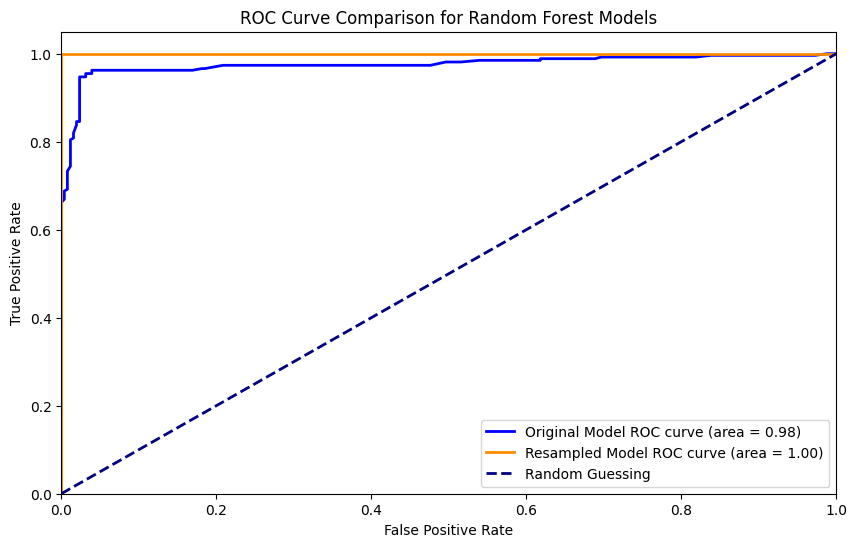

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, matthews_corrcoef, \
    roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Standardize datasets
scaler = StandardScaler()
X_train_scaled_alzheimer = scaler.fit_transform(X_train_alzheimer)
X_test_scaled_alzheimer = scaler.transform(X_test_alzheimer)
X_train_scaled_alzheimer_resampled = scaler.fit_transform(data_balanced.drop(columns='Diagnosis'))

# Instantiate Random Forest models
rf_model = RandomForestClassifier(random_state=42, n_estimators=200)  # Use more estimators as needed
rf_model_resampled = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=200)

# Perform stratified cross-validation for the original Random Forest model
accuracy_scores = cross_val_score(rf_model, X_train_scaled_alzheimer, y_train_alzheimer, cv=skf, scoring='accuracy')
y_pred_cross_val = cross_val_predict(rf_model, X_train_scaled_alzheimer, y_train_alzheimer, cv=skf)

# Perform stratified cross-validation for the resampled Random Forest model
accuracy_scores_resampled = cross_val_score(rf_model_resampled, X_train_scaled_alzheimer_resampled,
                                            data_balanced['Diagnosis'], cv=skf, scoring='accuracy')
y_pred_cross_val_resampled = cross_val_predict(rf_model_resampled, X_train_scaled_alzheimer_resampled,
                                               data_balanced['Diagnosis'], cv=skf)

# Fit the original Random Forest model
rf_model.fit(X_train_scaled_alzheimer, y_train_alzheimer)
y_pred_alzheimer = rf_model.predict(X_test_scaled_alzheimer)

# Fit the resampled Random Forest model
rf_model_resampled.fit(X_train_scaled_alzheimer_resampled, data_balanced['Diagnosis'])
y_pred_resampled = rf_model_resampled.predict(X_test_scaled_alzheimer)

# Evaluate cross-validated accuracy
print("Cross-validated Accuracy Scores (original model):")
print(accuracy_scores)
print(f'Cross-validated Mean Accuracy: {accuracy_scores.mean():.4f}')

print("Cross-validated Accuracy Scores (resampled model):")
print(accuracy_scores_resampled)
print(f'Cross-validated Mean Accuracy (resampled): {accuracy_scores_resampled.mean():.4f}')

# Evaluate accuracy on test set
accuracy = accuracy_score(y_test_alzheimer, y_pred_alzheimer)
accuracy_resampled = accuracy_score(y_test_alzheimer, y_pred_resampled)
print(f'Accuracy: {accuracy:.4f}')
print(f'Accuracy (resampled): {accuracy_resampled:.4f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test_alzheimer, y_pred_alzheimer)
conf_matrix_resampled = confusion_matrix(y_test_alzheimer, y_pred_resampled)
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Confusion Matrix (resampled):\n{conf_matrix_resampled}')

# Classification report
class_report = classification_report(y_test_alzheimer, y_pred_alzheimer)
class_report_resampled = classification_report(y_test_alzheimer, y_pred_resampled)
print(f'Classification Report:\n{class_report}')
print(f'Classification Report (resampled):\n{class_report_resampled}')

# Additional metrics: ROC-AUC and Matthews Correlation Coefficient
roc_auc = roc_auc_score(y_test_alzheimer, y_pred_alzheimer)
roc_auc_resampled = roc_auc_score(y_test_alzheimer, y_pred_resampled)
mcc = matthews_corrcoef(y_test_alzheimer, y_pred_alzheimer)
mcc_resampled = matthews_corrcoef(y_test_alzheimer, y_pred_resampled)

print(f'ROC-AUC: {roc_auc:.4f}')
print(f'ROC-AUC (resampled): {roc_auc_resampled:.4f}')
print(f'Matthews Correlation Coefficient: {mcc:.4f}')
print(f'Matthews Correlation Coefficient (resampled): {mcc_resampled:.4f}')

# Plot ROC Curves for both models
y_prob_alzheimer = rf_model.predict_proba(X_test_scaled_alzheimer)[:, 1]  # Get probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test_alzheimer, y_prob_alzheimer)
roc_auc = auc(fpr, tpr)

y_prob_resampled = rf_model_resampled.predict_proba(X_test_scaled_alzheimer)[:, 1]
fpr_resampled, tpr_resampled, _ = roc_curve(y_test_alzheimer, y_prob_resampled)
roc_auc_resampled = auc(fpr_resampled, tpr_resampled)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Original Model ROC curve (area = {roc_auc:.2f})')
plt.plot(fpr_resampled, tpr_resampled, color='darkorange', lw=2,
         label=f'Resampled Model ROC curve (area = {roc_auc_resampled:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for Random Forest Models')
plt.legend(loc='lower right')
plt.show()

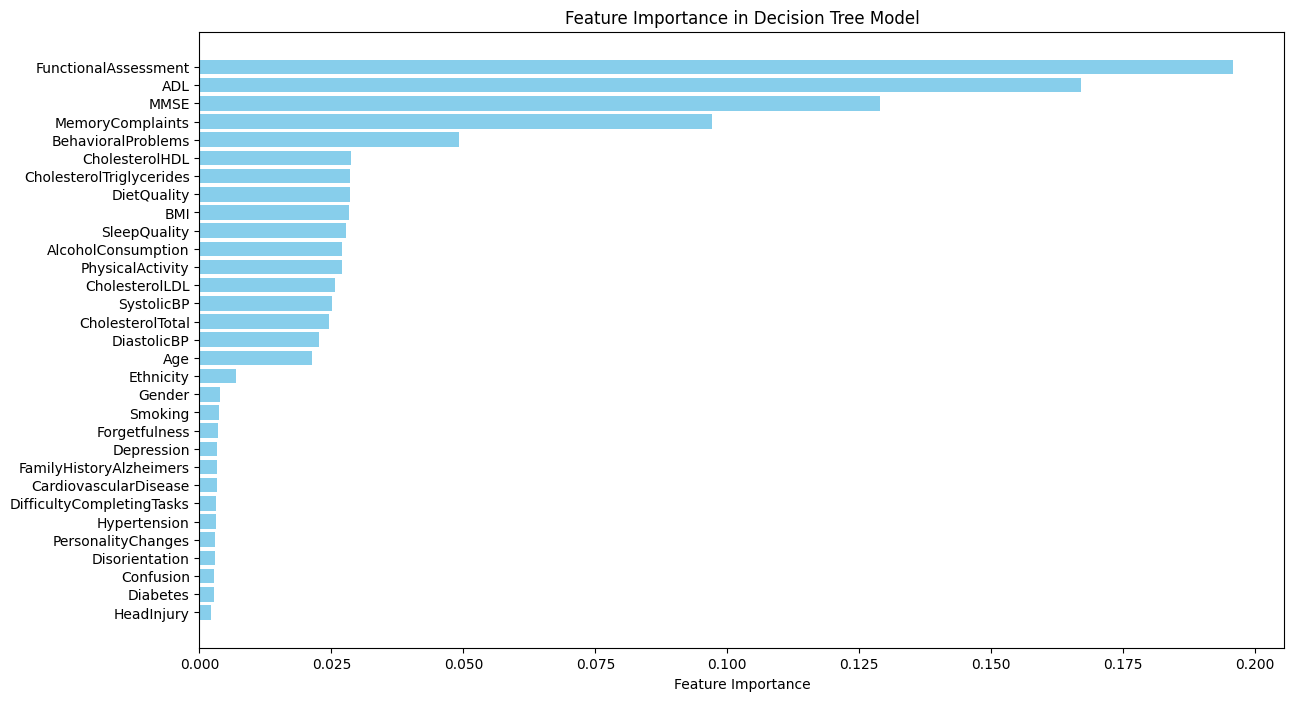

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming dt_model is your trained Decision Tree model
feature_importances = rf_model_resampled.feature_importances_

# Create a DataFrame for better handling and visualization
features_df = pd.DataFrame({
    'Feature': X_train_alzheimer.columns,  # Replace with actual column names if needed
    'Importance': feature_importances
})

# Sort the DataFrame by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(14, 8))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Decision Tree Model')
plt.gca().invert_yaxis()  # Invert y-axis to show largest importance at the top
plt.show()

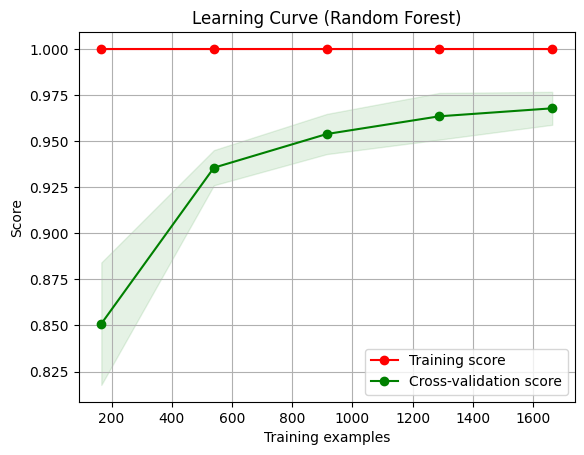

In [81]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a learning curve plot for an estimator.

    Parameters:
    - estimator : Object, the classifier or regressor
    - title : string, plot title
    - X : array-like of shape (n_samples, n_features), training vector
    - y : array-like of shape (n_samples) or (n_samples, n_features), target relative to X
    - ylim : tuple of shape (ymin, ymax), limits for the y-axis
    - cv : cross-validation strategy, optional
    - n_jobs : number of jobs to run in parallel
    - train_sizes : array-like, shape (n_ticks,), percentages of training data
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy'
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


# Example usage for your Random Forest model
plot_learning_curve(rf_model, "Learning Curve (Random Forest)", X_train_scaled_alzheimer, y_train_alzheimer, cv=skf,
                    n_jobs=-1)
plt.show()

In [83]:
import joblib
import os

# Assume rf_model_resampled is your trained model

# Specify the folder and file name for saving the model
folder_path = r'C:\Users\Pedro\Documents\GitHub\meia-aicare\challenge-02\notebooks\daniel_notebook'
file_name = '../src/models/alzheimer_model.joblib'
file_path = os.path.join(folder_path, file_name)

# Create the directory if it doesn't exist
os.makedirs(folder_path, exist_ok=True)

# Save the model
joblib.dump(rf_model_resampled, file_path)

print(f"Model saved to {file_path}")

Model saved to C:\Users\Pedro\Documents\GitHub\meia-aicare\challenge-02\notebooks\daniel_notebook\random_forest_model_resampled.joblib
